<a href="https://colab.research.google.com/github/samsaran11/mainflowinternshiptask3/blob/main/mainflowinternshiptask3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
sh = df.shape
print(f'The number of rows in dataset is {sh[0]}')
print(f'The number of columns in dataset is {sh[1]}')

The number of rows in dataset is 200
The number of columns in dataset is 5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Data cleaning
missing_data = df.isnull().sum()
missing_data

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.shape

(200, 5)

In [9]:
features = ['Age','Annual Income (k$)', 'Spending Score (1-100)']

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

df_scaled.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,-1.424569,-1.738999,-0.434801
1,2,Male,-1.281035,-1.738999,1.195704
2,3,Female,-1.352802,-1.700830,-1.715913
3,4,Female,-1.137502,-1.700830,1.040418
4,5,Female,-0.563369,-1.662660,-0.395980


In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_scaled['Genre'] = label_encoder.fit_transform(df_scaled['Genre'])
df_scaled.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,-1.424569,-1.738999,-0.434801
1,2,1,-1.281035,-1.738999,1.195704
2,3,0,-1.352802,-1.700830,-1.715913
3,4,0,-1.137502,-1.700830,1.040418
4,5,0,-0.563369,-1.662660,-0.395980


In [11]:
import warnings
warnings.filterwarnings("ignore")

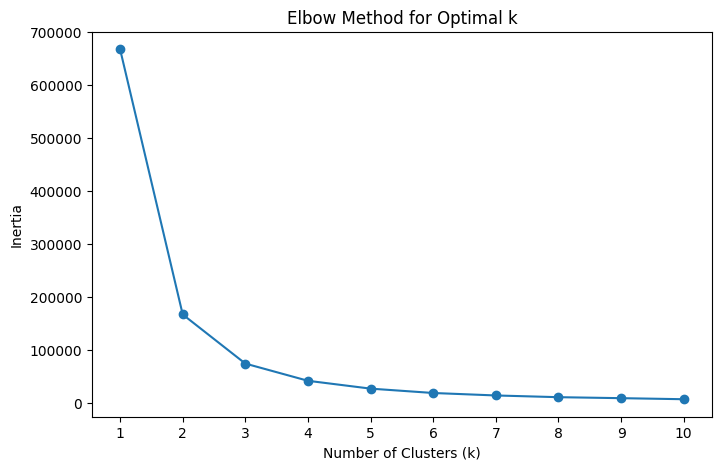

In [12]:
inertia = []
k_range = range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state = 42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

#plot the elbow method graph
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker = 'o')
plt.title("Elbow Method for Optimal k")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

In [13]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k,random_state = 42)
cluster_labels = kmeans.fit_predict(df_scaled)

df_scaled['Cluster'] = cluster_labels

df_scaled

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,-1.424569,-1.738999,-0.434801,2
1,2,1,-1.281035,-1.738999,1.195704,2
2,3,0,-1.352802,-1.700830,-1.715913,2
3,4,0,-1.137502,-1.700830,1.040418,2
4,5,0,-0.563369,-1.662660,-0.395980,2
...,...,...,...,...,...,...
195,196,0,-0.276302,2.268791,1.118061,1
196,197,0,0.441365,2.497807,-0.861839,1
197,198,1,-0.491602,2.497807,0.923953,1
198,199,1,-0.491602,2.917671,-1.250054,1


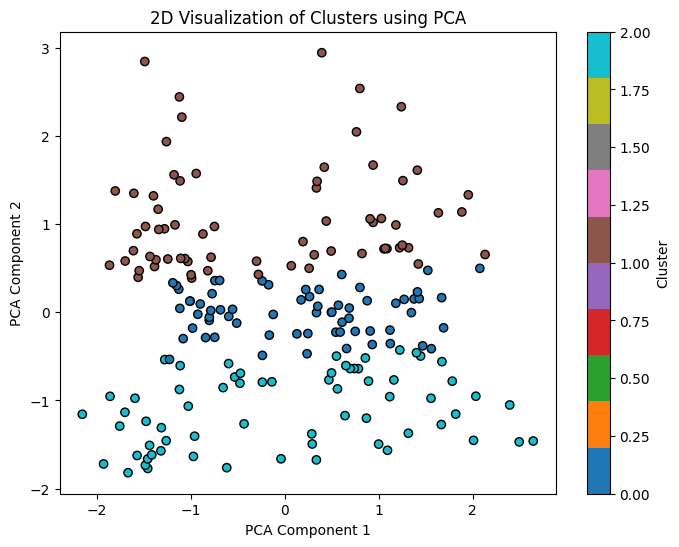

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_scaled_pca = pca.fit_transform(df_scaled[['Age','Annual Income (k$)', 'Spending Score (1-100)']])

plt.figure(figsize=(8,6))
plt.scatter(df_scaled_pca[:,0],df_scaled_pca[:,1],
            c=df_scaled['Cluster'],cmap='tab10', edgecolors='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Visualization of Clusters using PCA')
plt.colorbar(label='Cluster')
plt.show()

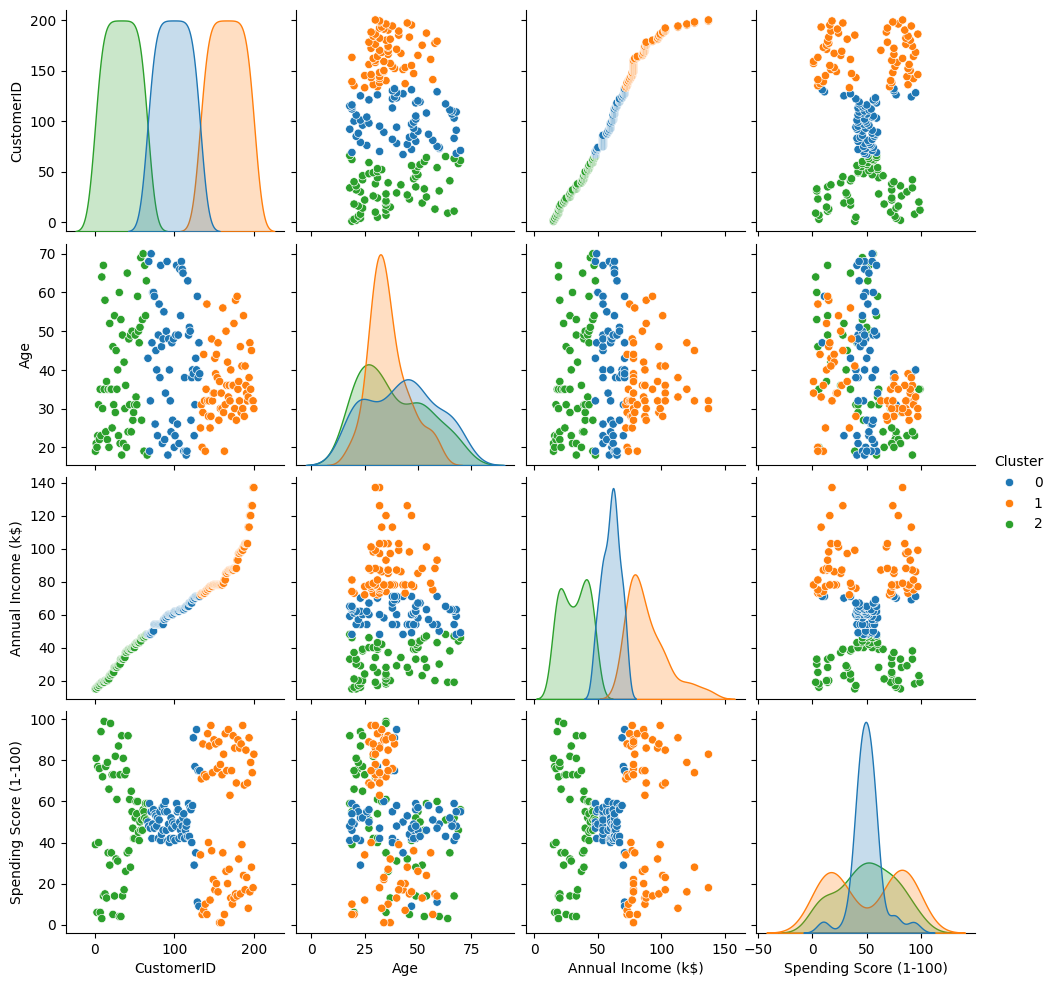

In [15]:
df_clustered = df.copy()
df_clustered['Cluster'] = df_scaled['Cluster']

sns.pairplot(df_clustered,hue='Cluster',palette='tab10',diag_kind='kde')
plt.show()

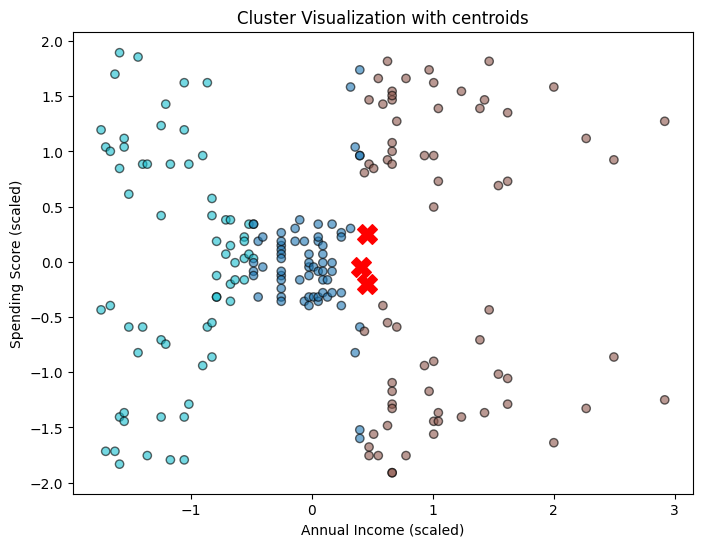

In [16]:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8,6))
plt.scatter(df_scaled['Annual Income (k$)'], df_scaled['Spending Score (1-100)'],
            c=df_scaled['Cluster'],cmap='tab10', edgecolors='k',alpha=0.6)
plt.scatter(centroids[:,1],centroids[:,2],c='red',marker='X', s=200, label='Centroids')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Cluster Visualization with centroids')
plt.show()
